In [2]:
%matplotlib inline

Building a simple plankton-mussel (NPZM) model
==========================================

---

In this tutorial, we will pretend that HRM just contract our team to determine if adding freshwater mussels in the Public Gardens (Halifax), could reduce the increase in phytoplankton biomass caused by people feeding the ducks. To tackle this question, first we will build a Nutrient/Phytoplankton/Zooplankton (NPZ) numerical model from scratch to simulate the ecosystem dynamics of the Public Gardens pond. Second, we will add "virtual" mussels to the model to see if phytoplankton biomass decreases. 

Objectives:
-----------

- design an NPZ model conceptually (already done in preceding PowerPoint)
- transfer our "conceptual model" to equations (already done in preceding PowerPoint)
- transfer our equations to computer code
- run your model and visualize its output
- quality control our model
- compute "ancillary diagnostic variables"
- use these "ancillary diagnostic variables" to understand the dynamics of our ecosystem
- add mussels to the model
- use the model to answer HRM's question: Can mussels decrease phytoplankton biomass caused in the Public Gardens?

---

#### Notes:

- Web-rendered URL for this tutorial: http://nbviewer.ipython.org/urls/bitbucket.org/Diego_Ibarra/aquaculturemodelling2017/raw/tip/Week2/Simple_Plankton_Mussel_Model.ipynb

---


Conceptual Model
----------------

Previously (in preceding PowerPoint) we built an NPZ model with the dynamics show in the diagram below. The "currency" of the model is nitrogen (i.e. $mmol N m^{-3}$) and the state variables are Nutrients ($N$), Phytoplankton ($P$) and Zooplankton ($Z$).

<img src="NPZmodel.png">

---

Partial differential equations
-----------------------------

Also in the preceding PowerPoint, we build our model's equations representing the time rate of change of Phytoplankton ($\partial P / \partial t$), Nutrients ($\partial N / \partial t$) and Zooplankton ($\partial Z / \partial t$), which are shown below (see symbols in table below):


(1) $$ \frac{\partial P}{\partial t} = \mu L^N P - \gamma L^P Z - m_P P$$

(2) $$  \frac{\partial N}{\partial t} = m_P P + m_ZZ - \mu L^N P $$

(3) $$  \frac{\partial Z}{\partial t} = \gamma L^P Z -m_ZZ $$

(4) $$L^N = \frac{N}{K+N}$$

(5) $$L^P = 1-e^{-\Lambda P}$$
<br><br>


Symbol  |  Units  |  Description
:---: | --- | ---
$P$ | $mmol N m^{-3}$ | phytonplankton concentration
$N$ | $mmol N m^{-3}$ | nutrients concentration
$Z$ | $mmol N m^{-3}$ | zooplankton concentration
$L^N$ | dimensionless | Limitation due to (low) nutrients on phytoplankton (see Eq. 4)
$L^P$ | dimensionless | Limitation due to (low) phytoplankton on zooplankton (see Eq. 5)
$K$ | $mmol N m^{-3}$ | Half-saturation for nutrient absoption by phytoplankton
$t$ | $days$ | time
$\Lambda$ | $mmol N^{-1} m^3$ | Initial slope of ingestion saturation of zooplankton
$m_P$ | $d^{-1}$ | mortality rate of phytoplankton
$m_Z$ | $d^{-1}$ | mortality rate of zooplankton
$\mu$ | $d^{-1}$ | growth rate of phytoplankto
$\gamma$ | $d^{-1}$ | growth rate of zooplankton


---

Discretized equations
-----------------

Also in the preceding PowerPoint we used a very simple discretization method (i.e. Euler method) to discretize our partial differential equations into equation in discrete space (i.e. not continuous space). The discretized equations are shown below:

(6) $$ P_{t+1} = P_t + \left\{ \left[ \mu L^N_t P_t - \gamma L^P_t Z_t - m_P P_t \right] \Delta t \right\} $$

(7) $$  N_{t+1} = N_t + \left\{ \left[ m_P P_t + m_Z Z_t - \mu L^N_t P_t \right] \Delta t \right\} $$

(8) $$  Z_{t+1} = Z_t +  \left\{ \left[ \gamma L^P_t Z_t -m_ZZ_t \right] \Delta t \right\} $$

(9) $$L^N_t = \frac{N_t}{K+N_t}$$

(10) $$L^P_t = 1-e^{-\Lambda P_t}$$

---

Transferring equations to computer code
---------------------------------------

**Spyder:** from here on you will be required to copy-paste bits of code from *"this website"* to *Spyder*, which is a free Integrated Development environment for Python that came included with *Anaconda*. To start, search in the Window's taskbar for  "*Spyder*".

The idea behind all this copy-pasting is to simulate the normal process that someone may follow in the development of a new model from scratch.

So, open *Spyder*, create a new file and save it as **NPZmodel.py**.

---


### Create parameters


Copy-paste into **NPZmodel.py** the following...

In [3]:
#%% Framework
days = 10
dt   = 0.01 # units: days

# Parameters
mu     = 0.5  # growth rate of pythoplankton (units: d^-1)
K      = 1    # half-saturation for nutrient absoption by pythoplankton (units: mmolN m^-3)
gamma  = 0.4  # growth rate of zooplankton (units: d^-1)
Lambda = 0.1  # initial slope of ingestion saturation of zooplankton (units: mmol N^-1 m^3)
mP     = 0.07 # mortality rate of pythoplankton (units: d^-1)
mZ     = 0.03 # mortality rate of zooplankton (units: d^-1)

# Initial conditions
Pinitial = 4  # initial pythoplankton concentration (units: mmolN m^-3)
Ninitial = 10 # initial nutrients concentration (units: mmolN m^-3)
Zinitial = 2  # initial zooplankton concentration (units: mmolN m^-3)

Just as a quick test...
<span class="run"></span> code and then type **mu** in the **Console** and then click **enter**. Python should reply with the value of **mu** as shown below...

<div class="c2c"></div>

In [4]:
mu

0.5

<div class="Q"><br>

What is the value of <b>K</b>?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

What is the value of <b>dt</b>?

<br><br><div class="qhelp"></div></div>

*******

## Using Checkpoints

**CHECKPOINTS** (like the one in the yellow link below) are text files containing the Python code that you should have in your **NPZmodel.py** file up to this point. As you continue down the lab, the code within CHECKPOINTS grows incrementally. CHECKPOINTS are great to compare against your own code to see if you did everything correctly. Additionally, if you get a bit lost, you can always click on an earlier "CHECKPOINT" link and copy-paste its contents to your file... that will get you all caught up, without having to redo the entire lab.

<span style="background-color:yellow;color:blue;font-size:17px">
<a href="https://bitbucket.org/Diego_Ibarra/aquaculturemodelling2017/raw/tip/Week2/checkpoints/NPZmodel_1.py" target="_blank">CHECKPOINT 1</a>
</span>



---

### Chores (calculate timestemps, create zero arrays, etc)

First we have to import a library called **numpy**. To do this, in **NPZmodel.py**, copy-paste the following at the top of the file, BEFORE the **"# Initial conditions"** section...

In [5]:
# Import libraries
import numpy as np

In **NPZmodel.py**, copy-paste the following after the **"# Initial conditions"** section...

In [6]:
#%% Chores (calculate timestemps, create zero vectors, create time vector)
NoSTEPS = int(days / dt) # Calculates the number of steps by dividing days by dt and rounding down
time = np.linspace(0,days,NoSTEPS) # Makes and vector array of equally spaced numbers from zero to "days"
N = np.zeros((NoSTEPS,),float) # makes a vector array of zeros (size: NoSTEPS rows by ONE column)
P = np.zeros((NoSTEPS,),float) # same as above
Z = np.zeros((NoSTEPS,),float) # same as above

<span class="run"></span> **NPZmodel.py** again. This time it created parameters AND it created vectors (filled with zeros) for N, P, Z and time. Just for curiosity, lets inspect what happened by copy-pasting the following into the **console**.

<div class="c2c"></div>

In [7]:
P

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

<div class="Q"><br>

The entire <b>P</b> array is filled with...

<br><br><div class="qhelp"></div></div>

Note that you can ask python to see ONLY part of the array: 

<div class="c2c"></div>

In [8]:
P[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Do you know what kind of object of **P**? You can figure it out by copy-pasting the following into the **console**.

<div class="c2c"></div>

In [9]:
type(P)

numpy.ndarray

A "numpy array" is a column of numbers. "Numpy arrays" allow you to do matrix algebra (like Matlab vectors). We'll use "numpy arrays" because they handle indexing nicely and because it is easy to make plots with them.

Do you know how long is the **P** array? ...or in simpler terms, how many rows are in the **P** column? 

You can figure it out by copy-pasting the following into the **console**.

<div class="c2c"></div>

In [10]:
len(P)

1000

Lets inspect the other variables that we created:

<div class="Q"><br>

What type of object is <b>N</b>?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

How long is the array <b>N</b>?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

What is the value of the <b>second</b> element of the array <b>N</b>?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

What is the value of the <b>last</b> element of the array <b>N</b>?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

What type of object is <b>time</b>?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

How long is the array <b>time</b>?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

What is the value of the <b>second</b> element of the array <b>time</b>?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

What is the value of the <b>last</b> element of the array <b>time</b>?

<br><br><div class="qhelp"></div></div>

Lets inspect one of the variables from the "Parameters" section.

<div class="Q"><br>

What type of object is <b>gamma</b>?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

How many "rows" are contained in <b>gamma</b>? 

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

What is the value of <b>gamma</b>?

<br><br><div class="qhelp"></div></div>

Ok. Now that you inspected the new variables and their contents, we can continue...

<span style="background-color:yellow;color:blue;font-size:17px">
<a href="https://bitbucket.org/Diego_Ibarra/aquaculturemodelling2017/raw/tip/Week2/checkpoints/NPZmodel_2.py" target="_blank">CHECKPOINT 2</a>
</span>

---

### Initializing with initial conditions

First, lets inspect our main state variables BEFORE initialization. Type the following in the **console**.

<div class="c2c"></div>


In [11]:
print(N[:5])
print(P[:5])
print(Z[:5])

[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]


Here we are "printing-to-screen" 3 lines. The first line contains the first 5 items in N, the second line contains the first 5 items in P, and the third line contains the first 5 items in Z. They are all zeros!

Now lets "initialize" our model. This is simply done by replacing the zero value of each our vectors with the previously chosen "initial conditions". Just copy paste the following to the end of **NPZmodel.py**

In [12]:
#%% Initializing with initial conditions
P[0] = Pinitial
N[0] = Ninitial
Z[0] = Zinitial

<span class="run"></span> code, and see what happened to your variables (i.e. by typing the following in the **console**).
<br>

<div class="c2c"></div>

In [13]:
print(N[:5])
print(P[:5])
print(Z[:5])

[10.  0.  0.  0.  0.]
[4. 0. 0. 0. 0.]
[2. 0. 0. 0. 0.]


<div class="Q"><br>

What is the value of the <b>FIRST</b> element of the <b>N</b>?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

What is the value of the <b>FIRST</b> element of the <b>P</b>?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

What is the value of the <b>FIRST</b> element of the <b>Z</b>?

<br><br><div class="qhelp"></div></div>

As you can see, your state variables had been "initialized" with the values of Ninitial, Pinitial and Zinitial.

<span style="background-color:yellow;color:blue;font-size:17px">
<a href="https://bitbucket.org/Diego_Ibarra/aquaculturemodelling2017/raw/tip/Week2/checkpoints/NPZmodel_3.py" target="_blank">CHECKPOINT 3</a>
</span>

---

### Main model

Ok! Now comes the time of truth! We need to write the main model loop... where the model runs and replaces all the zeros in our NPZ vectors for the actual modeled values.

Copy-paste the code below to the end of **NPZmodel.py**.

In [14]:
#%% *****************************************************************************
# MAIN MODEL LOOP *************************************************************
for t in range(0,NoSTEPS-1):
    L_N = N[t]/(K+N[t]) # Calculate Limitation due to (low) nutrients on pythoplankton
    L_P = 1-np.exp(-Lambda*P[t]) # Calculate Limitation due to (low) pythoplankton on zooplankton
    
    # Estimate model state at time t+1 
    P[t+1] = P[t] + (((mu*L_N*P[t]) - (gamma*L_P*Z[t])- (mP*P[t])) * dt)
    N[t+1] = N[t] + (((mP*P[t]) + (mZ*Z[t]) - (mu*L_N*P[t])) * dt)
    Z[t+1] = Z[t] + (((gamma*L_P*Z[t]) - (mZ*Z[t])) * dt)
# end of main model LOOP*******************************************************
# *****************************************************************************

<span class="run"></span> code again, and as you can see (i.e. type the following in the **console**), the zero values of our vectors have numbers now!

<br>
<div class="c2c"></div>

In [15]:
print(N[:5])
print(P[:5])
print(Z[:5])

[10.          9.98521818  9.97039042  9.95551661  9.94059663]
[4.         4.01274438 4.02552579 4.0383443  4.0512    ]
[2.         2.00203744 2.00408379 2.00613909 2.00820337]


Can you see that the zeros are gone? Actually, rather than just taking a look at the first 5 values, lets take a look at the entire **P** array.


<div class="c2c"></div>

In [16]:
P

array([ 4.        ,  4.01274438,  4.02552579,  4.0383443 ,  4.0512    ,
        4.06409295,  4.07702323,  4.08999092,  4.10299609,  4.11603881,
        4.12911916,  4.14223722,  4.15539306,  4.16858674,  4.18181835,
        4.19508796,  4.20839564,  4.22174147,  4.23512551,  4.24854784,
        4.26200853,  4.27550765,  4.28904527,  4.30262148,  4.31623632,
        4.32988989,  4.34358224,  4.35731345,  4.37108359,  4.38489272,
        4.39874092,  4.41262825,  4.42655479,  4.4405206 ,  4.45452575,
        4.46857031,  4.48265435,  4.49677792,  4.5109411 ,  4.52514396,
        4.53938656,  4.55366896,  4.56799123,  4.58235344,  4.59675565,
        4.61119792,  4.62568032,  4.64020291,  4.65476575,  4.6693689 ,
        4.68401243,  4.6986964 ,  4.71342086,  4.72818588,  4.74299152,
        4.75783783,  4.77272488,  4.78765273,  4.80262142,  4.81763102,
        4.83268159,  4.84777318,  4.86290584,  4.87807964,  4.89329462,
        4.90855084,  4.92384835,  4.93918721,  4.95456747,  4.96

<div class="Q"><br>

What are the values of <b>P</b>?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

What are the values of <b>N</b>?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

What are the values of <b>Z</b>?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

How many times was the code inside the "MAIN MODEL LOOP" executed?

<br><br><div class="qhelp"></div></div>

<span style="background-color:yellow;color:blue;font-size:17px">
<a href="https://bitbucket.org/Diego_Ibarra/aquaculturemodelling2017/raw/tip/Week2/checkpoints/NPZmodel_4.py" target="_blank">CHECKPOINT 4</a>
</span>

---

### Vizualization

Lets make some plots! But first we need to import a plotting library (i.e. matplotlib). To do so, copy-paste the following at the top of **NPZmodel.py**... right on the **"# Import libraries"** section:

In [17]:
import matplotlib.pyplot as plt

Now copy-paste the following at the bottom of **NPZmodel.py**... and <span class="run"></span> code.

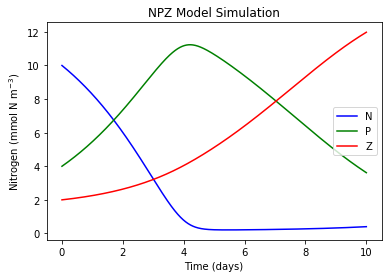

In [18]:
#%% Plotting
fig, (ax) = plt.subplots(1,1)
ax.plot(time,N,'b-')
ax.plot(time,P,'g-')
ax.plot(time,Z,'r-')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Nitrogen (mmol N m$^{-3}$)')
ax.set_title('NPZ Model Simulation')
plt.legend(['N','P','Z'])
plt.show()

Lets take a look at the plotting code above:

The 1st line of the plotting code `fig, (ax) = plt.subplots(1,1)` generates a figure and an axis inside the figure. For now they are both empty.

The 2nd line `ax.plot(time,N,'b-')` plots `time` versus `N` using a blue line.

The 3rd line `ax.plot(time,P,'g-')` plots `time` versus `P` using a green line.

The 4rd line `ax.plot(time,Z,'r-')` plots `time` versus `Z` using a red line.

The 5th line `ax.set_xlabel('Time (days)')` makes the label on the x axis.

The 6th line `ax.set_ylabel('Nitrogen (mmol N m$^{-3}$)')` makes the label on the y axis .

The 7th line `ax.set_title('NPZ Model Simulation')` makes the figure title.

The 8th line `plt.legend(['N','P','Z'])` makes the legends.

The last line `plt.show()` displays the figure.

Now lets take a close look at the figure and inspect the ecosystem dynamics that it show:

<div class="Q"><br>

What happens to phytoplankton (**P**) over time?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

What happens to the nutrients (**N**) over time?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

What happens to zooplankton (**Z**) over time?

<br><br><div class="qhelp"></div></div>

<span style="background-color:yellow;color:blue;font-size:17px">
<a href="https://bitbucket.org/Diego_Ibarra/aquaculturemodelling2017/raw/tip/Week2/checkpoints/NPZmodel_5.py" target="_blank">CHECKPOINT 5</a>
</span>

---

### Quality control

One of the ways to ensure you model is working correctly is to compute the **"Total Nitrogen of the System"**, which should remain constant over time; that is, no mass should be created nor destroyed during the model run.

First, lets create another zero vector for Total Nitrogen (`TotNit`). Copy-paste the following at the bottom of the **"Chores"** section:

In [19]:
TotNit = np.zeros((NoSTEPS,),float) # same as above

Then, copy-paste at the bottom of the **"# MAIN MODEL LOOP"** the following:

`TotNit[t+1] = P[t+1] + N[t+1] + Z[t+1]`
    
So it looks like this...

In [20]:
#%% MAIN MODEL LOOP *************************************************************
for t in range(0,NoSTEPS-1):
    L_N = N[t]/(K+N[t]) # Calculate Limitation due to (low) nutrients on pythoplankton
    L_P = 1-np.exp(-Lambda*P[t]) # Calculate Limitation due to (low) pythoplankton on zooplankton
    
    # Estimate model state at time t+1 
    P[t+1] = P[t] + (((mu*L_N*P[t]) - (gamma*L_P*Z[t])- (mP*P[t])) * dt)
    N[t+1] = N[t] + (((mP*P[t]) + (mZ*Z[t]) - (mu*L_N*P[t])) * dt)
    Z[t+1] = Z[t] + (((gamma*L_P*Z[t]) - (mZ*Z[t])) * dt)
    TotNit[t+1] = P[t+1] + N[t+1] + Z[t+1]

Finally lets plot by adding TotNit to the **"Plotting"** section, as shown below:

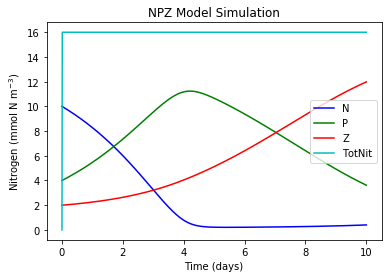

In [21]:
#%% Plotting
fig, (ax) = plt.subplots(1,1)
ax.plot(time,N,'b-')
ax.plot(time,P,'g-')
ax.plot(time,Z,'r-')
ax.plot(time,TotNit,'c-')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Nitrogen (mmol N m$^{-3}$)')
ax.set_title('NPZ Model Simulation')
plt.legend(['N','P','Z','TotNit'])
plt.show()

You probably should also take a look at the values of `TotNit`. 

<div class="Q"><br>

What happens to the Total Nitrogen in the System (**TotNit**) over time?

<br><br><div class="qhelp"></div></div>

<span style="background-color:yellow;color:blue;font-size:17px">
<a href="https://bitbucket.org/Diego_Ibarra/aquaculturemodelling2017/raw/tip/Week2/checkpoints/NPZmodel_6.py" target="_blank">CHECKPOINT 6</a>
</span>

---

### Ancillary diagnostic variables

Currently, we compute the limitations $L^N$ and $L^P$ every time step, but then we overwrite them. To better understand the dynamics of the ecosystem, we need to keep track of the evolution of $L^N$ and $L^P$ over time.  

First, lets create another zero vector for $L^N$ and $L^P$. Copy-paste the following at the bottom of the **"Chores"** section:

In [22]:
L_N = np.zeros((NoSTEPS,),float) # same as above
L_P = np.zeros((NoSTEPS,),float) # same as above

Then, modify **"# MAIN MODEL LOOP"** (by adding **[t]** after the **L_N** and **L_P**) so that your code looks as below:

In [23]:
#%% MAIN MODEL LOOP *************************************************************
for t in range(0,NoSTEPS-1):
    L_N[t] = N[t]/(K+N[t]) # Calculate Limitation due to (low) nutrients on pythoplankton
    L_P[t] = 1-np.exp(-Lambda*P[t]) # Calculate Limitation due to (low) pythoplankton on zooplankton
    
    # Estimate model state at time t+1 
    P[t+1] = P[t] + (((mu*L_N[t]*P[t]) - (gamma*L_P[t]*Z[t])- (mP*P[t])) * dt)
    N[t+1] = N[t] + (((mP*P[t]) + (mZ*Z[t]) - (mu*L_N[t]*P[t])) * dt)
    Z[t+1] = Z[t] + (((gamma*L_P[t]*Z[t]) - (mZ*Z[t])) * dt)
    TotNit[t+1] = P[t+1] + N[t+1] + Z[t+1]

Now, lets plot the evolution of the limitations by copy-pasting the following at the bottom of the **"Plotting"** section: 

<span class="run"></span> your code.

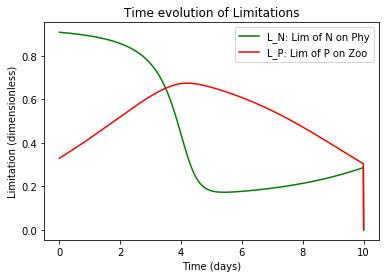

In [24]:
fig2, (ax) = plt.subplots(1,1)
ax.plot(time,L_N,'g-')
ax.plot(time,L_P,'r-')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Limitation (dimensionless)')
ax.set_title('Time evolution of Limitations')
plt.legend(['L_N: Lim of N on Phy','L_P: Lim of P on Zoo','TotNit'])
plt.show()

<div class="Q"><br>

In **day 1**, the value of L_N is high (close to 1). What does this mean?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

In **day 1**, the value of L_P is low (close-ish to 0). What does this mean?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

In **day 5**, the value of L_N is low (close-ish to 0). What does this mean?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

In **day 5**, the value of L_P is high (close-ish to 1). What does this mean?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

If you want to dump a truck-load of nutrients into the water to increase the biomass of phytoplankton, what day should you it to cause the largest effect on phytoplankton?

<br><br><div class="qhelp"></div></div>

<span style="background-color:yellow;color:blue;font-size:17px">
<a href="https://bitbucket.org/Diego_Ibarra/aquaculturemodelling2017/raw/tip/Week2/checkpoints/NPZmodel_7.py" target="_blank">CHECKPOINT 7</a>
</span>

---

### Adding sunlight

To add a bit more realism, we could create "virtual sunlight" and then add a limitation of phytoplankton as a function of sunlight. 

#### Creating "virtual sunlight"

To create our "virtual sunlight" we'll use a "quick and dirty" trick using sinusoidals:

(11) $$ I = I_{MaxDaily} sin(\omega_{day} t) + I_{MaxYearly} sin(\omega_{year} t)$$

where $I$ is solar irradiance ($\mu mol m^{-2} s^{-1}$), $t$ is time ($days$) and $\omega_{day}$ and $\omega_{year}$ are angular frequencies ($radians * day^{-1}$), which are related to the period, $T$ ($days$) as follows:

(12) $$ \omega = \frac{2 \pi}{T}$$

so... at the bottom of the **"# Chores"** section copy-paste the following:

In [25]:
I  = np.zeros((NoSTEPS,),float) # same as above

... and below the **"# Chores"** section copy-paste the following:

In [26]:
#%% Creating sunlight
for i in range(len(I)):
    I[i] = 600 * np.sin((2*np.pi*time[i])/1) + \
           500 * np.sin((2*np.pi*time[i])/365)
    
    # We can't have negative light... so negatives are made zero 
    if I[i] < 0:
        I[i] = 0

<span class="run"></span> run your code ...then <br>

<div class="c2c"></div>

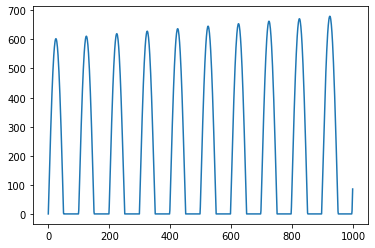

In [27]:
plt.plot(I)

<div class="Q"><br>

What is the value of **I** during **night** time?

<br><br><div class="qhelp"></div></div>

#### Limitation of phytoplankton as a fucntion of sunlight

Now that we created "artificial light", we can use light to limit the growth of phytoplankton.

First we have to made a new "limitation" using an Ivlev-type function:

(13) $$L^I = 1-e^{-\alpha P}$$

where $L^I$ (dimensionless) is the limitation due to (low) light on phytoplankton and $\alpha$ is the initial slope of the $PI$ curve.

...then we can modify equation (1) and (6) as follows:

(1) $$ \frac{\partial P}{\partial t} = \mu L^N L^I P - \gamma L^P Z - m_P P$$


(6) $$ P_{t+1} = P_t + \left\{ \left[ \mu L^N_t L^I_t P_t - \gamma L^P_t Z_t - m_P P_t \right] \Delta t \right\} $$

---

...add the $L^I_t$ vector to our code by copy-pasting the following at the bottom of **"#Chores"**:

In [28]:
L_I = np.zeros((NoSTEPS,),float) # same as above

...add **alpha** in the **"# Parameters"** sections:

In [29]:
alpha  = 0.004# initial slope of P vs I curve (units: {mmolN m^-3}^-1)

...change the **MAIN MODEL LOOP** as follows:

In [30]:
#%% MAIN MODEL LOOP *************************************************************
for t in range(0,NoSTEPS-1):
    L_N[t] = N[t]/(K+N[t]) # Calculate Limitation due to (low) nutrients on pythoplankton
    L_P[t] = 1-np.exp(-Lambda*P[t]) # Calculate Limitation due to (low) pythoplankton on zooplankton
    L_I[t] = 1-np.exp(-alpha*I[t])    
    
    # Estimate model state at time t+1 
    P[t+1] = P[t] + (((mu*L_N[t]*L_I[t]*P[t]) - (gamma*L_P[t]*Z[t])- (mP*P[t])) * dt)
    N[t+1] = N[t] + (((mP*P[t]) + (mZ*Z[t]) - (mu*L_N[t]*L_I[t]*P[t])) * dt)
    Z[t+1] = Z[t] + (((gamma*L_P[t]*Z[t]) - (mZ*Z[t])) * dt)
    TotNit[t+1] = P[t+1] + N[t+1] + Z[t+1]

...and change plotting code as follows, then <span class="run"></span> your code.

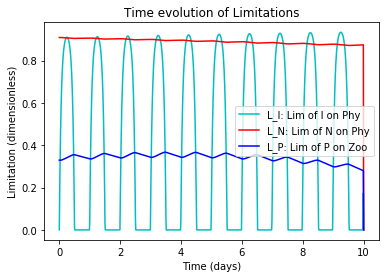

In [31]:
fig2, (ax) = plt.subplots(1,1)
ax.plot(time,L_I,'c-')
ax.plot(time,L_N,'r-')
ax.plot(time,L_P,'b-')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Limitation (dimensionless)')
ax.set_title('Time evolution of Limitations')
plt.legend(['L_I: Lim of I on Phy','L_N: Lim of N on Phy','L_P: Lim of P on Zoo'])
plt.show()

<div class="Q"><br>

At noon every day, L_I is high (close to 1). What does this mean?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Every night, L_I is zero. What does this mean?

<br><br><div class="qhelp"></div></div>

<span style="background-color:yellow;color:blue;font-size:17px">
<a href="https://bitbucket.org/Diego_Ibarra/aquaculturemodelling2017/raw/tip/Week2/checkpoints/NPZmodel_8.py" target="_blank">CHECKPOINT 8</a>
</span>

---

Time to see it all put together... 

Lets run the model for 3 years by chaging `days` to `365 * 3`

In [32]:
#%% Framework
days = 365 * 3

<span class="run"></span> code and see how the plots look:

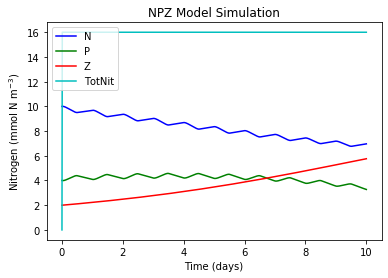

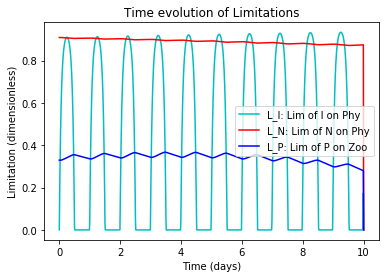

In [33]:
#%% Plotting
fig, (ax) = plt.subplots(1,1)
ax.plot(time,N,'b-')
ax.plot(time,P,'g-')
ax.plot(time,Z,'r-')
ax.plot(time,TotNit,'c-')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Nitrogen (mmol N m$^{-3}$)')
ax.set_title('NPZ Model Simulation')
plt.legend(['N','P','Z','TotNit'])
plt.show()

fig2, (ax) = plt.subplots(1,1)
ax.plot(time,L_I,'c-')
ax.plot(time,L_N,'r-')
ax.plot(time,L_P,'b-')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Limitation (dimensionless)')
ax.set_title('Time evolution of Limitations')
plt.legend(['L_I: Lim of I on Phy','L_N: Lim of N on Phy','L_P: Lim of P on Zoo'])
plt.show()

<span style="background-color:yellow;color:blue;font-size:17px">
<a href="https://bitbucket.org/Diego_Ibarra/aquaculturemodelling2017/raw/tip/Week2/checkpoints/NPZmodel_9.py" target="_blank">CHECKPOINT 9</a>
</span>

Take a look at the graphs and answer the following questions:

<div class="Q"><br>

In year 2 (i.e days 366 to 731)... Can you see the large "spike" in phytoplankton (~ day 420) followed by another smaller spike in phytoplankton at ~ day 580?

<br><br><div class="qhelp"></div></div>

The spikes in P are consistent with the "spring bloom" and the "fall bloom"... which are known plankton dynamics in temperate regions. Our model somewhat mimics real-life dynamics!

<div class="Q"><br>

Why do you think nutrients (N) are so high during the winters (e.g. day 300)? 

<br><br><div class="qhelp"></div></div>

---

Adding mussels
--------------

Now that we got the NPZ Planktonic Ecosystem model working, the next step is to add mussels and see if the phytoplankton biomass decreases (i.e. compared to the model without mussels).

First lets redraw our conceptual model...

<img src="NPZMmodel.png">

---

Partial differential equations
-------------------------------

To add mussels, we wrote a brand new equation to represent the time rate of change of Mussel Biomass ($\partial M / \partial t$), and we also added the corresponding extra terms to the equations of $\partial P / \partial t$ and $\partial N / \partial t$.

For clarity, lets show all the equations with all the new changes. Please note that we also have 2 new limitation equations, a self-limitation to prevent mussels to grow forever ($L^M$) and a limitation of grazing by mussels so that mussels stop eating at low phytoplankton concentrations ($L^{MP}$). 


(1) $$ \frac{\partial P}{\partial t} = \mu L^N L^I P - \gamma L^P Z - \psi L^M L^{MP} M - m_P P$$

(2) $$  \frac{\partial N}{\partial t} = m_P P + m_ZZ + m_MM - \mu L^N P $$

(3) $$  \frac{\partial Z}{\partial t} = \gamma L^P Z -m_ZZ $$

(4) $$  \frac{\partial M}{\partial t} = \psi L^M L^{MP} M -m_MM $$

(5) $$L^N = \frac{N}{K+N}$$

(6) $$L^P = 1-e^{-\Lambda P}$$

(7) $$L^I = 1-e^{-\alpha P}$$

(8) $$L^M = \frac{M}{Km+M}$$

(9) $$L^{Mp} = \frac{P}{Kmp+P}$$
<br><br>


Below is the full model code with the new "bits" to include mussels. Make the changes then... <span class="run"></span> your code.

C:\Users\Diego\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


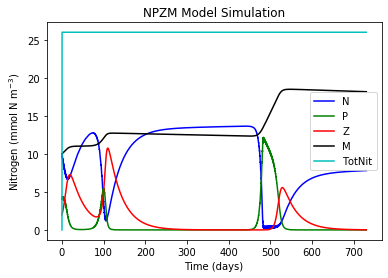

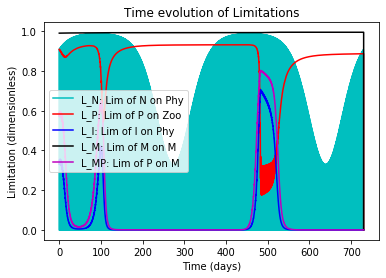

In [34]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

#%% Framework
days = 365 * 2
dt   = 0.01 # units: days

# Parameters
mu     = 0.5  # growth rate of pythoplankton (units: d^-1)
K      = 1    # half-saturation for nutrient absoption by pythoplankton (units: mmolN m^-3)
gamma  = 0.4  # growth rate of zooplankton (units: d^-1)
Lambda = 0.1  # initial slope of ingestion saturation of zooplankton (units: mmol N^-1 m^3)
alpha  = 0.004# initial slope of P vs I curve (units: {mmolN m^-3}^-1)
psi    = 0.01    # half-saturation for phytoplankton absoption by mussels (units: mmolN m^-3)
mP     = 0.07 # mortality rate of pythoplankton (units: d^-1)
mZ     = 0.03 # mortality rate of zooplankton (units: d^-1)
mM     = 0.0001 # mortality rate of zooplankton (units: d^-1)
Km     = 0.1    # half-saturation for phytoplankton feeding by mussels due to mussel size (units: mmolN m^-3)
Kmp     = 3    # half-saturation for phytoplankton feeding by mussels (units: mmolN m^-3)

# Initial conditions
Pinitial = 4  # initial pythoplankton concentration (units: mmolN m^-3)
Ninitial = 10 # initial nutrients concentration (units: mmolN m^-3)
Zinitial = 2  # initial zooplankton concentration (units: mmolN m^-3)
Minitial = 10  # initial mussel concentration (units: mmolN m^-3)

#%% Chores (calculate timestemps, create zero vectors, create time vector)
NoSTEPS = int(days / dt) # Calculates the number of steps by dividing days by dt and rounding down
time = np.linspace(0,days,NoSTEPS) # Makes and vector array of equally spaced numbers from zero to "days"
N = np.zeros((NoSTEPS,),float) # makes a vector array of zeros (size: NoSTEPS rows by ONE column)
P = np.zeros((NoSTEPS,),float) # same as above
Z = np.zeros((NoSTEPS,),float) # same as above
M = np.zeros((NoSTEPS,),float) # same as above
TotNit = np.zeros((NoSTEPS,),float) # same as above
L_N = np.zeros((NoSTEPS,),float) # same as above
L_P = np.zeros((NoSTEPS,),float) # same as above
I  = np.zeros((NoSTEPS,),float) # same as above
L_I = np.zeros((NoSTEPS,),float) # same as above
L_M = np.zeros((NoSTEPS,),float) # same as above
L_MP = np.zeros((NoSTEPS,),float) # same as above

#%% Creating sunlight
for i in range(len(I)):
    I[i] = 600 * np.sin((2*np.pi*time[i])/1) + \
           500 * np.sin((2*np.pi*time[i])/365)
    
    # We can't have negative light... so negatives are made zero 
    if I[i] < 0:
        I[i] = 0

#%% Initializing with initial conditions
P[0] = Pinitial
N[0] = Ninitial
Z[0] = Zinitial
M[0] = Minitial


#%% *****************************************************************************
# MAIN MODEL LOOP *************************************************************
for t in range(0,NoSTEPS-1):
    L_N[t] = N[t]/(K+N[t]) # Calculate Limitation due to (low) nutrients on pythoplankton
    L_P[t] = 1-np.exp(-Lambda*P[t]) # Calculate Limitation due to (low) pythoplankton on zooplankton
    L_I[t] = 1-np.exp(-alpha*I[t])
    L_M[t] = M[t]/(Km+M[t]) # Calculate Limitation due to "old age" on mussels
    L_MP[t] = P[t]/(Kmp+P[t]) # Calculate Limitation due to "old age" on mussels
    
    # Estimate model state at time t+1 
    P[t+1] = P[t] + (((mu*L_N[t]*L_I[t]*P[t]) - (gamma*L_P[t]*Z[t])- (psi*L_M[t]*L_MP[t]*M[t]) - (mP*P[t])) * dt)
    N[t+1] = N[t] + (((mP*P[t]) + (mZ*Z[t]) + (mM*M[t]) - (mu*L_N[t]*L_I[t]*P[t])) * dt)
    Z[t+1] = Z[t] + (((gamma*L_P[t]*Z[t]) - (mZ*Z[t])) * dt)
    M[t+1] = M[t] + (((psi*L_M[t]*L_MP[t]*M[t]) - (mM*M[t])) * dt)
    TotNit[t+1] = P[t+1] + N[t+1] + Z[t+1] + M[t+1]
# end of main model LOOP*******************************************************
# *****************************************************************************
    
#%% Plotting
fig, (ax) = plt.subplots(1,1)
ax.plot(time,N,'b-')
ax.plot(time,P,'g-')
ax.plot(time,Z,'r-')
ax.plot(time,M,'k-')
ax.plot(time,TotNit,'c-')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Nitrogen (mmol N m$^{-3}$)')
ax.set_title('NPZM Model Simulation')
plt.legend(['N','P','Z','M','TotNit'])
plt.show()

fig2, (ax) = plt.subplots(1,1)
ax.plot(time,L_I,'c-')
ax.plot(time,L_N,'r-')
ax.plot(time,L_P,'b-')
ax.plot(time,L_M,'k-')
ax.plot(time,L_MP,'m-')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Limitation (dimensionless)')
ax.set_title('Time evolution of Limitations')
plt.legend(['L_N: Lim of N on Phy','L_P: Lim of P on Zoo','L_I: Lim of I on Phy','L_M: Lim of M on M','L_MP: Lim of P on M'])
plt.show()

Here you can see that mussels grow during times of abundant phytoplankton (spring and fall) and slowly decrease biomass during times of low phytoplankton (winter and summer).

<div class="Q"><br>

What happens to the mussels (M) when L_MP is **high** (e.g. day 100) ? 

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

What happens to the mussels (M) when L_MP is **zero** (e.g. day 300)? 

<br><br><div class="qhelp"></div></div>

<span style="background-color:yellow;color:blue;font-size:17px">
<a href="https://bitbucket.org/Diego_Ibarra/aquaculturemodelling2017/raw/tip/Week2/checkpoints/NPZmodel_10.py" target="_blank">CHECKPOINT 10</a>
</span>

****

You can run the model with different initial concentration of $M$ to see what happens to $P$. However, the best way to visualize the exact effect that mussels have on the system, is to run the model several times (with and without mussels) and then compare the results.

First run the model as is... then save the Phytoplankton state in a separate variable ( `P_withMussels` ):

<div class="c2c"></div>

In [35]:
P_withMussels = P

Then change the number of mussels to zero, and run the model again...

In [36]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

#%% Framework
days = 365 * 2
dt   = 0.01 # units: days

# Parameters
mu     = 0.5  # growth rate of pythoplankton (units: d^-1)
K      = 1    # half-saturation for nutrient absoption by pythoplankton (units: mmolN m^-3)
gamma  = 0.4  # growth rate of zooplankton (units: d^-1)
Lambda = 0.1  # initial slope of ingestion saturation of zooplankton (units: mmol N^-1 m^3)
alpha  = 0.004# initial slope of P vs I curve (units: {mmolN m^-3}^-1)
psi    = 0.01    # half-saturation for phytoplankton absoption by mussels (units: mmolN m^-3)
mP     = 0.07 # mortality rate of pythoplankton (units: d^-1)
mZ     = 0.03 # mortality rate of zooplankton (units: d^-1)
mM     = 0.0001 # mortality rate of zooplankton (units: d^-1)
Km     = 0.1    # half-saturation for phytoplankton feeding by mussels due to mussel size (units: mmolN m^-3)
Kmp     = 3    # half-saturation for phytoplankton feeding by mussels (units: mmolN m^-3)

# Initial conditions
Pinitial = 4  # initial pythoplankton concentration (units: mmolN m^-3)
Ninitial = 10 # initial nutrients concentration (units: mmolN m^-3)
Zinitial = 2  # initial zooplankton concentration (units: mmolN m^-3)
Minitial = 0  # initial mussel concentration (units: mmolN m^-3)

#%% Chores (calculate timestemps, create zero vectors, create time vector)
NoSTEPS = int(days / dt) # Calculates the number of steps by dividing days by dt and rounding down
time = np.linspace(0,days,NoSTEPS) # Makes and vector array of equally spaced numbers from zero to "days"
N = np.zeros((NoSTEPS,),float) # makes a vector array of zeros (size: NoSTEPS rows by ONE column)
P = np.zeros((NoSTEPS,),float) # same as above
Z = np.zeros((NoSTEPS,),float) # same as above
M = np.zeros((NoSTEPS,),float) # same as above
TotNit = np.zeros((NoSTEPS,),float) # same as above
L_N = np.zeros((NoSTEPS,),float) # same as above
L_P = np.zeros((NoSTEPS,),float) # same as above
I  = np.zeros((NoSTEPS,),float) # same as above
L_I = np.zeros((NoSTEPS,),float) # same as above
L_M = np.zeros((NoSTEPS,),float) # same as above
L_MP = np.zeros((NoSTEPS,),float) # same as above

#%% Creating sunlight
for i in range(len(I)):
    I[i] = 600 * np.sin((2*np.pi*time[i])/1) + \
           500 * np.sin((2*np.pi*time[i])/365)
    
    # We can't have negative light... so negatives are made zero 
    if I[i] < 0:
        I[i] = 0

#%% Initializing with initial conditions
P[0] = Pinitial
N[0] = Ninitial
Z[0] = Zinitial
M[0] = Minitial


#%% *****************************************************************************
# MAIN MODEL LOOP *************************************************************
for t in range(0,NoSTEPS-1):
    L_N[t] = N[t]/(K+N[t]) # Calculate Limitation due to (low) nutrients on pythoplankton
    L_P[t] = 1-np.exp(-Lambda*P[t]) # Calculate Limitation due to (low) pythoplankton on zooplankton
    L_I[t] = 1-np.exp(-alpha*I[t])
    L_M[t] = M[t]/(Km+M[t]) # Calculate Limitation due to "old age" on mussels
    L_MP[t] = P[t]/(Kmp+P[t]) # Calculate Limitation due to "old age" on mussels
    
    # Estimate model state at time t+1 
    P[t+1] = P[t] + (((mu*L_N[t]*L_I[t]*P[t]) - (gamma*L_P[t]*Z[t])- (psi*L_M[t]*L_MP[t]*M[t]) - (mP*P[t])) * dt)
    N[t+1] = N[t] + (((mP*P[t]) + (mZ*Z[t]) + (mM*M[t]) - (mu*L_N[t]*L_I[t]*P[t])) * dt)
    Z[t+1] = Z[t] + (((gamma*L_P[t]*Z[t]) - (mZ*Z[t])) * dt)
    M[t+1] = M[t] + (((psi*L_M[t]*L_MP[t]*M[t]) - (mM*M[t])) * dt)
    TotNit[t+1] = P[t+1] + N[t+1] + Z[t+1] + M[t+1]
# end of main model LOOP*******************************************************
# *****************************************************************************

Again, save the Phytoplankton state in a separate variable (e.g. `P_noMussels`):

<div class="c2c"></div>

In [37]:
P_noMussels = P

Now lets do a plot to see the exact difference...

<div class="c2c"></div>

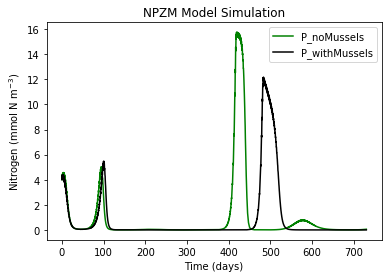

In [38]:
#%% Plotting
fig, (ax) = plt.subplots(1,1)
ax.plot(time,P_noMussels,'g-')
ax.plot(time,P_withMussels,'k-')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Nitrogen (mmol N m$^{-3}$)')
ax.set_title('NPZM Model Simulation')
plt.legend(['P_noMussels','P_withMussels'])
plt.show()

<div class="Q"><br>

What was the effect of mussels on the **magnitude** of the spring bloom (i.e. days 400 to 500)?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

What was the effect of mussels on the **timing** of the spring bloom (i.e. days 400 to 500)?

<br><br><div class="qhelp"></div></div>

As you can see, adding mussels to the pond in the Public Gardens decreases the concentration of phytoplankton... by about 20% at its peak (in the second years). The addition of mussels also delayed the "spring bloom". 

_Please beware that this model was designed as a teaching tool and it is too simplistic to adequately represent dynamics in realistic embayments_.

# **This is the end of lab**

*******************
*******************

Code below is for formatting of this lab. Do not alter!

In [39]:
# Loads css file and applies it to lab HTML
from IPython.core.display import HTML
def css():
    style = open("../css/custom.css", "r").read()
    return HTML(style)
css()